# Explore Data Science Academy Classification Hackathon Student Solution

© Explore Data Science Academy


# Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

<img src="C:\Users\F5481295\OneDrive - FRG\Downloads\06 - Advanced Classification\LANGUAGE IDENTIFICATION CLASSIFICATION HACKATHON" width=400 height=400 />

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, we will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering/Data Pre-Processing</a>

<a href=#five>5. Model Development</a>

<a href=#six>6. Model Training and Testing</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [120]:
# Libraries for loading data, data manipulation and data visulisation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import re # Regular expression python module
import string

# nltk for preprocessing of text data
import nltk
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Labraries for model builduing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [3]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [4]:
train.head(10) # To view the first 10 rows of the train set data

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [5]:
test.tail(10) # To view the last 10 rows of the train set data

,index,text
5672,5673,Die raad kan van tyd tot tyd en in ooreenstemm...
5673,5674,halutshedzo ya ' tshiimo tsha u vha na vhudzim...
5674,5675,botlalo tšeo di hlokegago o mongwe le o mongwe.
5675,5676,Muanewa-muhali. Mafhungo o he a lungano a kwam...
5676,5677,Afitafiti go tšwa go leloko go netefatša tlhok...
5677,5678,You mark your ballot in private.
5678,5679,Ge o ka kgetha ka bowena go se šomiše Mofani k...
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ..."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella ..."
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.


In [6]:
#Understand the number of features and data points in the train dataset
train.shape

(33000, 2)

In [7]:
#Understand the number of features and data points in the test dataset
test.shape

(5682, 2)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


It seems like the columns have no null values, but we can check just to be sure,

In [9]:
train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [10]:
test.isnull().sum()

index    0
text     0
dtype: int64

Therefore, we can see that both the train set and test set data have no null values.

In [11]:
train["lang_id"].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

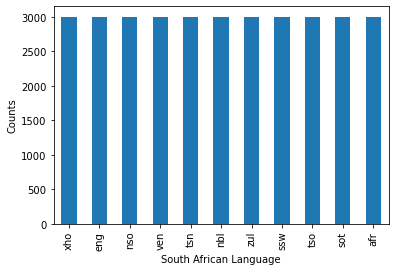

In [12]:
train['lang_id'].value_counts().plot(kind='bar')
plt.xlabel('South African Language')
plt.ylabel('Counts')
plt.show()

As we can see on the bar graph above, the language IDs have the same number of value counts. This means we are dealing with balanced data, which is the type of data we want to work with to get better working models.

<a id="four"></a>
## 4. Data Pre-Processing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

We are going to create a function called `cleaning`, which will Pre-process the text column. The function will:
* make every letter lower case
* remove punctuation
* remove numbers
* remove whitespaces
* replace new line with space

In [13]:
def cleaning(text):
    text = text.lower()
    text = ''.join([x for x in text if x not in string.punctuation])
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub("\n"," ",text)
    text = ' '.join(text.split())
    
    return text 

In [14]:
train['clean_text'] = train['text'].apply(cleaning)
test['clean_text'] = test['text'].apply(cleaning)

In [15]:
train.head() # looking at the train dataset after cleaning

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [16]:
test.head() # looking at the test datasetafter cleaning

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta


Next, we will convert the `text` column from **object** data type to **numeric** data type, so that we can be able to use it in the modelling section.
We will also use **Label Encoding** to convert the labels in the `lang_id` column into a numeric form so as to convert them into the machine-readable form.

In [17]:
# Defining feature and target variable
X = train['clean_text']
y = train['lang_id']

In [124]:
vect = TfidfVectorizer(ngram_range=(1,2), min_df=2)
X_vect = vect.fit_transform(X)
test_vect = vect.transform(test['clean_text'])

#y = LabelEncoder().fit_transform(y)

In [125]:
print ("The Train set size ", X_vect.shape)
print ("The Test set size ", test_vect.shape)

The Train set size  (33000, 206620)
The Test set size  (5682, 206620)


In [126]:
train['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Before we can begin with our modelling we have to split the train data into **train** and **test** set.

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=46)

In [22]:
log_r = LogisticRegression()

log_r.fit(X_train, y_train)

pred_log = log_r.predict(X_test)

In [23]:
print(accuracy_score(y_test, pred_log))

0.9959090909090909


In [24]:
print(classification_report(y_test, pred_log))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       618
         eng       1.00      1.00      1.00       608
         nbl       0.99      0.99      0.99       607
         nso       1.00      1.00      1.00       603
         sot       1.00      1.00      1.00       611
         ssw       1.00      1.00      1.00       613
         tsn       1.00      1.00      1.00       611
         tso       1.00      1.00      1.00       588
         ven       1.00      1.00      1.00       604
         xho       0.99      1.00      1.00       576
         zul       0.98      0.98      0.98       561

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [25]:
print(log_r.score(X_train, y_train))

0.9993939393939394


In [25]:
# Making predictions on the test data set
log_submission = log_r.predict(test_vect)

# Appending the prediction results to the test set, in a new column called 'sentiment'
output = pd.DataFrame( data = {'index': test['index'],
                               'lang_id': log_submission })

# Creating a csv file
output.to_csv('log_submission.csv', index = False, quoting = 3)

In [26]:
# Random forest

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

pred_forest = forest.predict(X_test)

In [27]:
print(accuracy_score(y_test, pred_forest))

0.9903030303030304


In [28]:
print(classification_report(y_test, pred_forest))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       618
         eng       0.99      1.00      1.00       608
         nbl       0.99      0.96      0.97       607
         nso       1.00      1.00      1.00       603
         sot       1.00      1.00      1.00       611
         ssw       0.99      0.98      0.98       613
         tsn       1.00      1.00      1.00       611
         tso       1.00      1.00      1.00       588
         ven       1.00      1.00      1.00       604
         xho       0.97      0.99      0.98       576
         zul       0.95      0.97      0.96       561

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



In [29]:
# Making predictions on the test data set
forest_submission = forest.predict(test_vect)

# Appending the prediction results to the test set, in a new column called 'sentiment'
output = pd.DataFrame( data = {'index': test['index'],
                               'lang_id': log_submission })

# Creating a csv file
output.to_csv('forest_submission.csv', index = False)

In [29]:
# support Vector Machine

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [30]:
print(accuracy_score(y_test, svc_pred))

0.9972727272727273


In [31]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       618
         eng       1.00      1.00      1.00       608
         nbl       0.99      0.99      0.99       607
         nso       1.00      1.00      1.00       603
         sot       1.00      1.00      1.00       611
         ssw       1.00      1.00      1.00       613
         tsn       1.00      1.00      1.00       611
         tso       1.00      1.00      1.00       588
         ven       1.00      1.00      1.00       604
         xho       0.99      1.00      1.00       576
         zul       0.99      0.99      0.99       561

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [40]:
# Making predictions on the test data set
svc_submission = svc.predict(test_vect)

# Appending the prediction results to the test set, in a new column called 'sentiment'
output = pd.DataFrame( data = {'index': test['index'],
                               'lang_id': svc_submission })

# Creating a csv file
output.to_csv('svc_submission.csv', index = False)

In [128]:
# Naive Bayes

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

pred_bayes = naive_bayes.predict(X_test)

In [129]:
print(accuracy_score(y_test, pred_bayes))

0.9989393939393939


In [34]:
print(classification_report(y_test, pred_bayes))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       618
         eng       0.99      1.00      1.00       608
         nbl       1.00      0.99      1.00       607
         nso       1.00      1.00      1.00       603
         sot       1.00      1.00      1.00       611
         ssw       1.00      1.00      1.00       613
         tsn       1.00      1.00      1.00       611
         tso       1.00      1.00      1.00       588
         ven       1.00      1.00      1.00       604
         xho       1.00      1.00      1.00       576
         zul       1.00      1.00      1.00       561

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



In [39]:
# Making predictions on the test data set
bayes_submission = naive_bayes.predict(test_vect)

# Appending the prediction results to the test set, in a new column called 'sentiment'
output = pd.DataFrame( data = {'index': test['index'],
                               'lang_id': bayes_submission })

# Creating a csv file
output.to_csv('bayes_submission.csv', index = False)

In [130]:
param = {'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}
    
clf = GridSearchCV(naive_bayes,param,scoring='roc_auc',cv=10,return_train_score=True) 
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='roc_auc')

In [131]:
y_opt = clf.predict(X_test)

In [132]:
print("The accuracy for our tuned model is: ", accuracy_score(y_test, y_opt))

The accuracy for our tuned model is:  0.998030303030303
